# 📊 01_data_cleaning.ipynb
This notebook loads the cat collar sensor data, explores it visually, and prepares it for AI model training.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/cat_sensor_log.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,body_temp,ambient_temp,humidity
0,2025-05-20 23:40:15.289453,38.183472,22.836471,43.776533
1,2025-05-20 23:40:16.289453,38.299688,23.300565,42.888323
2,2025-05-20 23:40:17.289453,38.366646,23.478792,46.235470
3,2025-05-20 23:40:18.289453,38.246491,23.552660,43.535869
4,2025-05-20 23:40:19.289453,38.242478,23.293694,45.239296


In [2]:
# Basic statistics
df.describe()

,timestamp,body_temp,ambient_temp,humidity
count,7200,7200.000000,7200.000000,7200.000000
mean,2025-05-21 00:40:14.789453056,38.202881,23.494610,45.005302
min,2025-05-20 23:40:15.289453,37.825228,22.374681,38.024149
25%,2025-05-21 00:10:15.039453184,38.134421,23.290504,43.631905
50%,2025-05-21 00:40:14.789453056,38.200419,23.492619,44.975081
75%,2025-05-21 01:10:14.539452928,38.268633,23.699729,46.345776
max,2025-05-21 01:40:14.289453,39.706848,24.908499,61.688597
std,NaN,0.109284,0.304026,2.068638


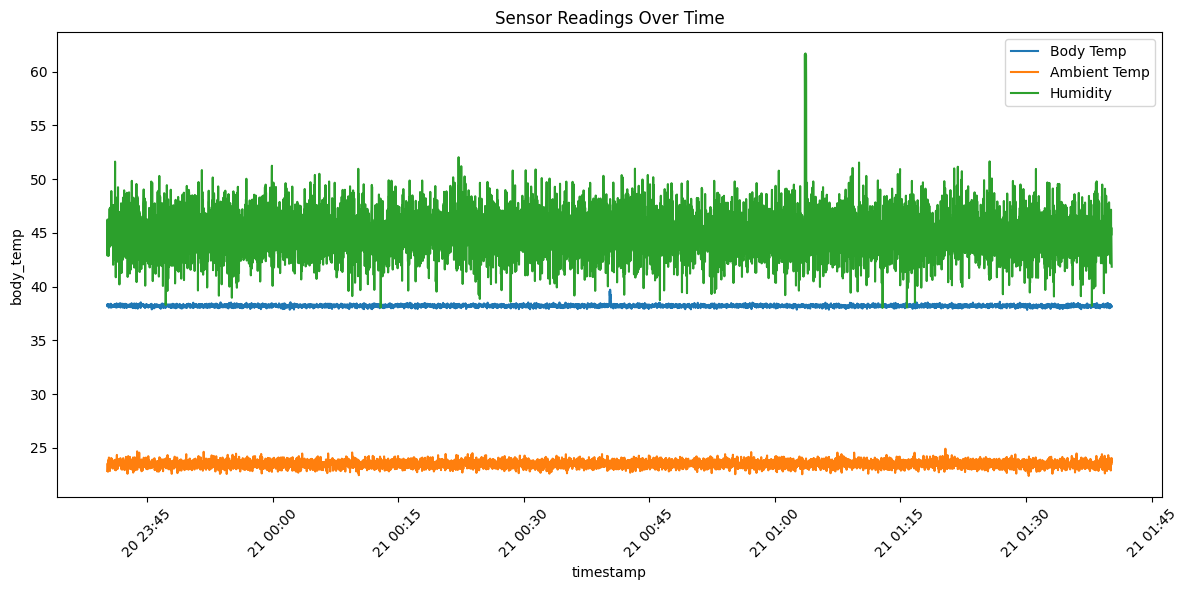

In [3]:
# Plot each sensor
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='body_temp', data=df, label='Body Temp')
sns.lineplot(x='timestamp', y='ambient_temp', data=df, label='Ambient Temp')
sns.lineplot(x='timestamp', y='humidity', data=df, label='Humidity')
plt.title('Sensor Readings Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [4]:
from sklearn.ensemble import IsolationForest
import joblib

features = ['body_temp', 'ambient_temp', 'humidity']
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(df[features])

joblib.dump(model, "../models/anomaly_model.pkl")
print("Model trained and saved.")


Model trained and saved.
